### By: Manisha Singh

# The Sparks Foundation

## Task 5: Computer Vision & Internet of Things: Object Detection / Optical Character Recognition (ORC) 

### Problem: Implement an object detector which identifies the classes of the objects in an image or video.


#### Step1: Import libraries.

In [2]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#### Step2: Apply image detector on a batch of image.

In [3]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

In [26]:
width = 1028
height = 1028

#Load image by Opencv2
img = cv2.imread(r'C:\Users\akswn\OneDrive\Desktop\image.jfif')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)

#### Step3: Predict label.

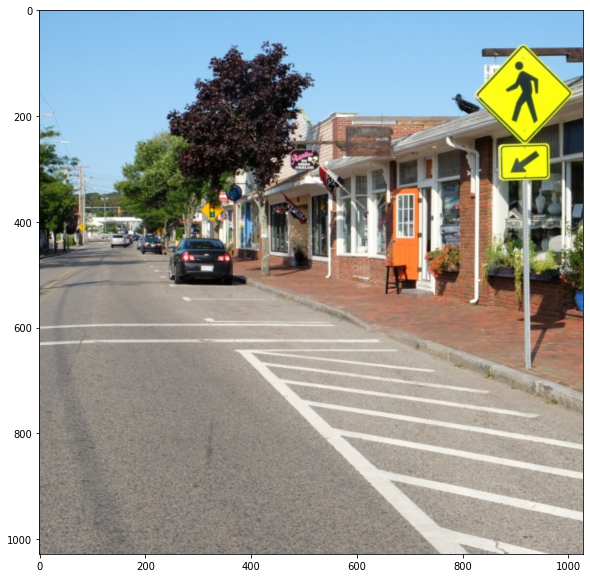

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(rgb)

In [28]:
boxes, scores, classes, num_detections = detector(rgb_tensor)

In [29]:
labels = pd.read_csv(r'C:\Users\akswn\OneDrive\Desktop\labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

In [30]:
labels.head()

ID
1        person
2       bicycle
3           car
4    motorcycle
5      airplane
Name: OBJECT (2017 REL.), dtype: object

In [31]:
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

In [32]:
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score)}%'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

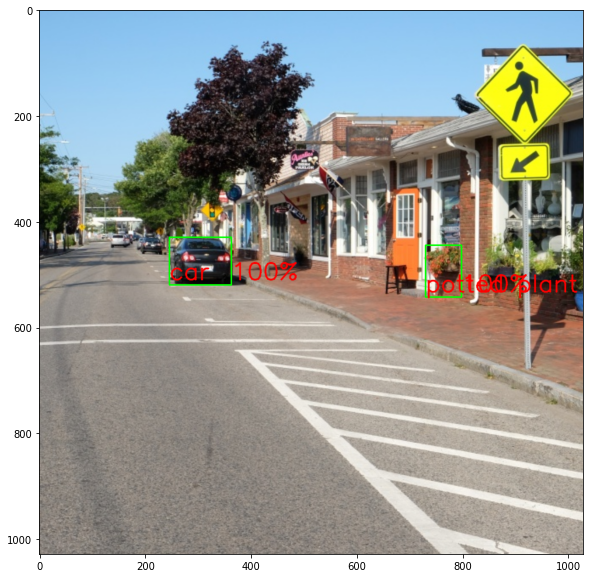

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(img_boxes)

plt.savefig('image_pred.jpg',transparent=True, )